___
<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 


# PRIMER EXÁMEN PARCIAL
# SIMULACIÓN DE PROCESOS FINANCIEROS

## Examen Tema 1
## Nombre: Oscar Eduardo Flores Hernández

## Fecha: 22 de febrero del 2021

## Por: Oscar David Jaramillo Z.

### Responde los siguientes cuestionamientos usando al menos 10000 simulaciones

## 1. Un juego de lanzamiento de una moneda (5 puntos)

Al ingresar al casino, descubres que, además de los juegos habituales (blackjack, ruleta, etc.), ofrecen un nuevo juego interesante con las siguientes reglas.
Reglas del juego.
- Cada jugada del juego consiste en lanzar repetidamente una moneda imparcial hasta que la diferencia entre el número de caras lanzadas y el número de sellos es 3.
- Si decides jugar el juego, debes pagar $ \$ 1 $ por cada lanzamiento de la moneda. No puedes salir durante una jugada del juego.
- Usted recibe $\$8 $ al final de cada uno de los juego.

Por lo tanto, ganas dinero si el número de lanzamientos requeridos es menor a 8, pero pierdes dinero si se requieren más de 8 lanzamientos.
Con el juego planteado anteriormente, responda las siguientes preguntas:
1. ¿Cuál es el promedio de tiradas hasta que termina un juego? ¿Cuál es su desviación estándar? (dibuja su histograma). 
2. Para el inciso anterior ¿Cuál es la probabilidad de que tires más de 10 veces para terminar un juego? ¿ y de que tires menos de 5 veces?.
3. Imagina  que lanzas 100 tiros exactos la moneda. ¿Cuál es tu valor esperado de \$\$ ganado/perdido? ¿Y tu valor más probable?¿Cuál es la probabilidad de ganar dinero? (Grafica el histograma de simulaciones).
4. Imagina que comienzas con $\$30$ ¿Cuál es el valor esperado del número de  tiradas que debes realizar antes de quedarte sin dinero? ¿Cuál es la probabilidad de realizar más de 150 tiradas? (grafica el histograma correspondiente).

In [138]:
# Solución
import numpy as np
import matplotlib.pyplot as plt

def moneda():
    m = np.random.choice([-1,1]) # 0 si sello, 1 si cara 
    return m
    
def juego():
    dif = 0
    tiradas = 0
    while abs(dif) < 3: 
        dif += moneda()
        tiradas += 1
        print(dif) # Avance en el juego con cada tirada. Se sugiere comentar esta línea.
    return tiradas # Cantidad de veces que fue necesario tirar la moneda. 

juego()


-1
-2
-3


3

Promedio tiros: 8.98204 
 Desviación estandar tiros: 6.933420327543975
Wall time: 13.9 s


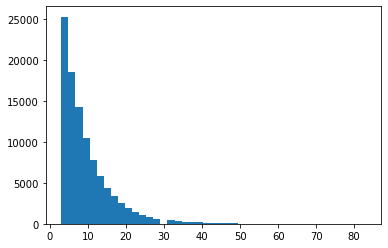

In [121]:
%%time
def repeat(func, n):
    return [func() for i in range(n)]

N = 100000
varios_juegos = np.array(repeat(juego, N))
plt.hist(varios_juegos, bins= 43);
print('Promedio tiros: {} \n Desviación estandar tiros: {}' .format(np.mean(varios_juegos), np.std(varios_juegos)))

In [125]:
# Probabilidad de ganar en menos de 5 tiros
len(varios_juegos[varios_juegos < 5])/N

0.25262

In [126]:
# Probabilidad de 'ganar' en más de 10 tiros
len(varios_juegos[varios_juegos > 10])/N

0.31467

Promedio de ganancias: -12.47984 
 Desviación estandar de ganancias: 20.409193849204332
Wall time: 76 ms


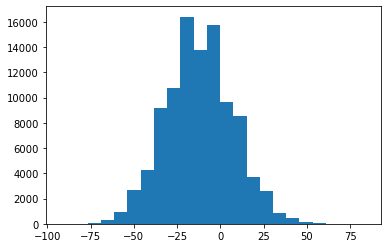

In [165]:
%%time
# Si tiramos la moneda 100 veces: 
def juego100(tiradas = 100):
    dif = 0
    ganancias = 0
    for i in range(tiradas): 
        ganancias -= 1 
        dif += moneda()
        if abs(dif) >= 3:
            dif = 0
            ganancias += 8
#         print(dif) # Avance en el juego con cada tirada. Se sugiere comentar esta línea.
    return ganancias # Cantidad de veces que fue necesario tirar la moneda. 

N = 100000
varios_juegos100 = np.array(repeat(juego100, N))
plt.hist(varios_juegos100, bins= 23);
print('Promedio de ganancias: {} \n Desviación estandar de ganancias: {}' .format(np.mean(varios_juegos100), np.std(varios_juegos100)))

In [164]:
# Probabilidad de ganar dinero
len(varios_juegos100[varios_juegos100 > 0])/N

0.2598

Promedio tiros: 257.87112 
 Desviación estandar tiros: 295.6829632392533
Wall time: 7min 56s


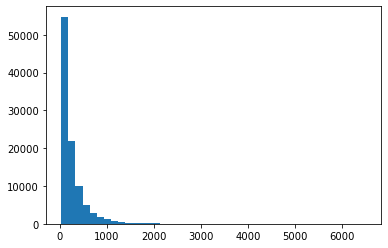

In [170]:
%%time
# Si tenemos $30 y jugamos hasta que se terminen: 
def juego30(dinero = 30):
    dif = 0
    tiradas = 0
    while dinero > 0:
        dinero -= 1 
        tiradas += 1
        dif += moneda()
        if abs(dif) >= 3:
            dif = 0
            dinero += 8
#         print(dif) # Avance en el juego con cada tirada. Se sugiere comentar esta línea.
    return tiradas # Cantidad de veces que fue necesario tirar la moneda. 

N = 100000
varios_juegos30 = np.array(repeat(juego30, N))
plt.hist(varios_juegos30, bins= 43);
print('Promedio tiros: {} \n Desviación estandar tiros: {}' .format(np.mean(varios_juegos30), np.std(varios_juegos30)))

In [228]:
# Probabilidad de que supere 150 tiros
len(varios_juegos30[varios_juegos30 > 150])/N

0.51217

## 2. (5 puntos)
El juego de dados requiere que el jugador arroje dos dados una o más veces hasta que se llegue a una decisión sobre si él (o ella) gana o pierde. Él gana si la primera tirada resulta en una suma de 7 u 11 o, alternativamente, si la primera suma es 4, 5, 6, 8, 9 o 10 y la misma suma reaparece antes de que aparezca una suma de 7. Por el contrario, pierde si la primera tirada resulta en una suma de 2, 3 o 12 o, alternativamente, si la primera suma es 4, 5, 6, 8, 9 o 10 y aparece una suma de 7 antes de la primera suma reaparece.
1. Calcule la probabilidad de ganar corriendo 10,000 simulaciones.
2. Imagina que cada juego ganas o pierdes $\$50$. Si inicias con $\$500$. ¿Cuál es tu valor esperado de dinero después de 10 juegos? ¿y el más probable? ¿Cuál es la probabilidad de ganar dinero?.

In [241]:
# Para las condiciones, 1 si gana jugador 1, 2 si gana jugador 2, 0 si se tiene que esperar a que reaparezca la primer suma
condiciones = {
    2:2,
    3:2,
    4:0,
    5:0,
    6:0,
    7:1,
    8:0,
    9:0,
    10:0,
    11:1,
    12:2 
}

In [270]:
def dados(n = 2):
    return np.random.randint(1,7, size = n)

def juego_dados():
    res_dados = dados().sum()
    if condiciones[res_dados] > 0:
        return condiciones[res_dados]
    done = 0
    while done == 0:
        otros_dados = dados().sum()
        if otros_dados == 7:
            return 2
        if otros_dados == res_dados:
            return 1

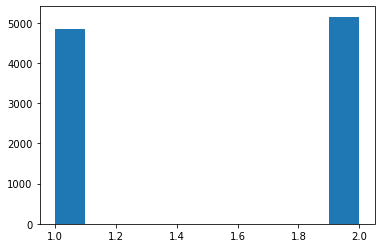

In [275]:
# jugador1 (yo) vs jugador2 (el otro)
N = 10000
juegos_dados = np.array(repeat(juego_dados, N))
plt.hist(juegos_dados);

In [280]:
# Probabilidad de ganar: 
len(juegos_dados[juegos_dados == 1])/N

0.4846

Promedio ganancias: 492.94 
 Desviación estandar ganancias: 158.65105231292983


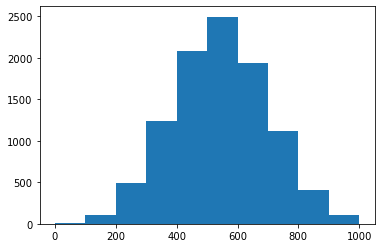

In [305]:
# jugar 10 veces: 
def juego_dados10(n = 10, capital_inicial = 500):
    res_juegos = np.array(repeat(juego_dados, n))
    res_juegos[res_juegos == 1] = 50 # si gano el juego
    res_juegos[res_juegos == 2] = -50 # si pierdo el juego 
    return res_juegos.sum() + capital_inicial

N = 10000
varios_juegos_dados10 = np.array(repeat(juego_dados10,N))
plt.hist(varios_juegos_dados10);
print('Promedio ganancias: {} \n Desviación estandar ganancias: {}' .format(np.mean(varios_juegos_dados10), np.std(varios_juegos_dados10)))

In [307]:
# Probabilidad de ganar después de 10 juegos:
len(varios_juegos_dados10[varios_juegos_dados10 > 500])/N

0.3573

## 3. (5 puntos)

Se eligen tres puntos uniformemente al azar del perímetro de un círculo unitario. Utilice la simulación de Monte Carlo para calcular la probabilidad de que los puntos formen un triángulo agudo, ¿cuál es la probabilidad de generar aleatoriamente triángulos agudos?

Suponga que 10.000 simulaciones son suficientes para calcular $P$.

> Ayuda: 
> 1. https://www.universoformulas.com/matematicas/trigonometria/resolucion-triangulos/
> 2. Distancia entre un par de puntos en el eje cartesiano $$d=\sqrt{(x_2-x_1)^2 + (y_2 - y_1)^2}$$
> 3. Coordenadas polares $$x=R\cos (\theta), \quad y=R\sin (\theta)$$
> 4. https://es.wikipedia.org/wiki/Tri%C3%A1ngulos_agudos_y_obtusos

In [480]:
# Solución
def random_triangle():
    
    theta = np.random.rand(3)*2*np.pi # Generamos los puntos en theta
    x = np.cos(theta) # calculamos el equivalente en x dentro del círculo unitario
    y = np.sin(theta) # calculamos la posición de y
    return x,y
random_triangle()

(array([ 0.9903249 , -0.82775422, -0.93901405]),
 array([-0.13876811,  0.56109087,  0.34387878]))

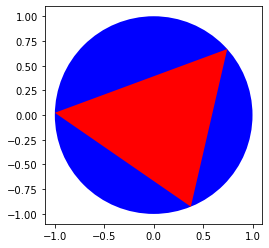

In [484]:
import matplotlib.pyplot as plt
def draw_triangle_and_circle(rt):
    triangle_x, triangle_y = rt[0],rt[1]
    plt.axes()

    circle = plt.Circle((0, 0), radius=1, fc='b')
    plt.gca().add_patch(circle)

    points = list(zip(triangle_x, triangle_y))
    polygon = plt.Polygon(points, fc='r')
    plt.gca().add_patch(polygon)

    plt.axis('scaled')
    plt.show()


rt = random_triangle()
draw_triangle_and_circle(rt)

In [485]:
def calculate_distance(xa, ya ,xb ,yb):
    return np.sqrt((xa-xb)**2 + (ya-yb)**2)

def distances(rt): 
    # 
    d_ab = calculate_distance(rt[0][0], rt[1][0], rt[0][1], rt[1][1])
    d_ac = calculate_distance(rt[0][0], rt[1][0], rt[0][2], rt[1][2]) 
    d_bc = calculate_distance(rt[0][1], rt[1][1], rt[0][2], rt[1][2])
    return d_ab, d_ac, d_bc

d_ab, d_ac, d_bc = distances(rt) 
print('Distancias entre los puntos: {} ,{}, {} '.format(d_ab, d_ac, d_bc))

Distancias entre los puntos: 1.6365603561684112 ,1.859297407502302, 1.6717465221720125 


In [486]:
def angle(a,b,c):
    """If a, b, and c are known and we want to calculate the angle A we use this formula, derived from the Cosine Theorem."""
    A = np.arccos((b**2 + c**2 - a**2)/(2*b*c))
    return A

def angles(d_ab, d_ac, d_bc):
    A = angle(d_ab, d_ac, d_bc)/np.pi*180
    B = angle(d_ac, d_ab, d_bc)/np.pi*180
    C = angle(d_bc, d_ab, d_ac)/np.pi*180
    return A,B,C

print('Angulos internos del triangulo: {}'.format(angles(d_ab, d_ac, d_bc)))

Angulos internos del triangulo: (54.9130017110778, 68.38012039492813, 56.7068778939941)


In [487]:
# Is it acute? 0 means no, 1 means yes
1-(np.array(angles(d_ab, d_ac, d_bc)) > 90).sum()

1

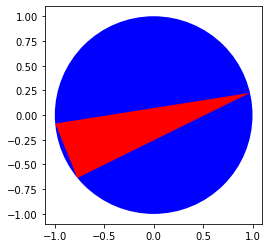

1

In [488]:
def simulate_random_triangle(draw = False):
    rt = random_triangle()
    if draw:
        draw_triangle_and_circle(rt)
    d_ab, d_ac, d_bc = distances(rt) 
    return 1 - (np.array(angles(d_ab, d_ac, d_bc)) > 90).sum() # This function only returns if the angle is acute or not. 
simulate_random_triangle(True)

In [541]:
N = 10000
many_acute_triangles = np.array(repeat(simulate_random_triangle,N))
print('Probabilidad de que un triángulo cualquiera sea agudo: {}'.format(many_acute_triangles.mean()))

Probabilidad de que un triángulo cualquiera sea agudo: 0.252


## Extra. Una pequeña obra de arte

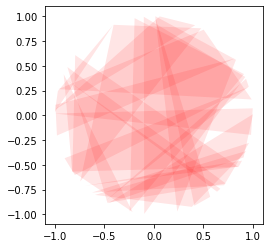

In [523]:
import matplotlib.pyplot as plt
def some_art(n = 10, alpha = 0.1):
    plt.axes()
    for i in range(n):
        rt = random_triangle()
        triangle_x, triangle_y = rt[0],rt[1]
        
        points = list(zip(triangle_x, triangle_y))
        polygon = plt.Polygon(points, fc='r', alpha = 0.1)
        plt.gca().add_patch(polygon)
        
    plt.axis('scaled')
    plt.show()

some_art(20)

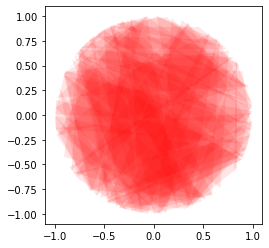

In [535]:
some_art(50,0.001)

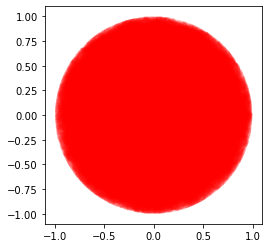

In [536]:
some_art(500,0.001)

## Parámetros de entrega

- La solución a este primer trabajo se debe realizar en un notebook de jupyter, utilizando la sintaxis markdown y además se deben de reportar el código de cómo obtuvieron los resultados de simulación (debidamente comentado y con la programación óptima como hemos venido trabajando), y con los resultados obtenidos responder a las preguntas dadas.
- La fecha de entrega de este trabajo es **01/03/2021** hasta las 6 pm y se debe de entregar a través de canvas, donde habilitaré un espacio para entrega de este Exámen. Recuerden después de las 6 pm del miércoles se deshabilita en Canvas la entrega de la tarea, así que considérenlo para que no vayan a tener inconvenientes. Recuerden lo acordado el primer día de clase.
- Cada ejercicio tendrá el mismo porcentaje y el porcentaje del exámen será de el 15%.